In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from word2number import w2n

import scipy.stats as stat
import pylab

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression ,f_classif,mutual_info_classif    ## Feature Engineering
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

## Nural Networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [2]:
df = pd.read_csv(r'D:\PYTHON Practice Projecs\World_Cup2021_data.csv')

In [17]:
pd.options.display.max_columns =100

In [18]:
df

,Unnamed: 0,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,bowling_arm,bowling_style,most_individual_wickets,economy,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
0,Match_1,Australia,SouthAfrica,Group_stage,Australia,Fielding,afternoon,Abu_Dhabi,30,Josh_Hazlewood,Right,Pacer,2,4.80,Australia,Aiden_Markram,Right,40,111.10,SouthAfrica,119,1,Josh_Hazlewood,Australia
1,Match_2,England,Windies,Group_stage,England,Fielding,evening,Dubai,33,Adil_Rashid,Right,Leg_spin,4,0.90,England,Jos_Buttler,Right,24,109.10,England,56,1,Moeen_Ali,England
2,Match_3,Srilanka,Bangladesh,Group_stage,Srilanka,Fielding,afternoon,Sharjah,34,Shakib_al_Hassan,Left,Off_spin,2,5.67,Bangladesh,Charith_Asalanka,Left,80,163.20,Srilanka,172,1,Charith_Asalanka,Srilanka
3,Match_4,Pakistan,India,Group_stage,Pakistan,Fielding,evening,Dubai,34,Shaheen_shah,Left,Pacer,3,7.75,Pakistan,Muhammad_Rizwan,Right,79,143.60,Pakistan,152,1,Shaheen_shah,Pakistan
4,Match_5,Afghanistan,Scotland,Group_stage,Afghanistan,Batting,evening,Sharjah,33,Mujeeb_ur_Rehman,Right,Off_spin,5,5.00,Afghanistan,Najibullah_Zadran,Left,59,173.53,Afghanistan,191,0,Mujeeb_ur_Rehman,Afghanistan
5,Match_6,SouthAfrica,Windies,Group_stage,SouthAfrica,Fielding,afternoon,Dubai,33,Dwaine_Pretorious,Right,Pacer,3,8.05,SouthAfrica,Evin_Lewis,Left,56,160.00,Windies,144,1,Anrich_Nortje,SouthAfrica
6,Match_7,Pakistan,New_Zealand,Group_stage,Pakistan,Fielding,evening,Sharjah,29,Haris_Rauf,Right,Pacer,4,5.50,Pakistan,Muhammad_Rizwan,Right,33,97.06,Pakistan,135,1,Haris_Rauf,Pakistan
7,Match_8,England,Bangladesh,Group_stage,Bangladesh,Batting,afternoon,Abu_Dhabi,30,Tymal_Mills,Left,Pacer,3,6.75,England,Jason_Roy,Right,61,160.50,England,125,1,Jason_Roy,England
8,Match_9,Namibia,ScotLand,Group_stage,Namibia,Fielding,evening,Abu_Dhabi,29,Ruben_Trumpelmann,Left,Pacer,3,4.25,Namibia,Michael_Leask,Right,44,162.90,ScotLand,110,1,Ruben_Trumpelmann,Namibia
9,Match_10,Australia,Srilanka,Group_stage,Australia,Fielding,evening,Dubai,28,Adam_Zampa,Right,Leg_spin,2,3.00,Australia,David_Warner,Left,65,154.76,Australia,155,1,Adam_Zampa,Australia


<AxesSubplot:>

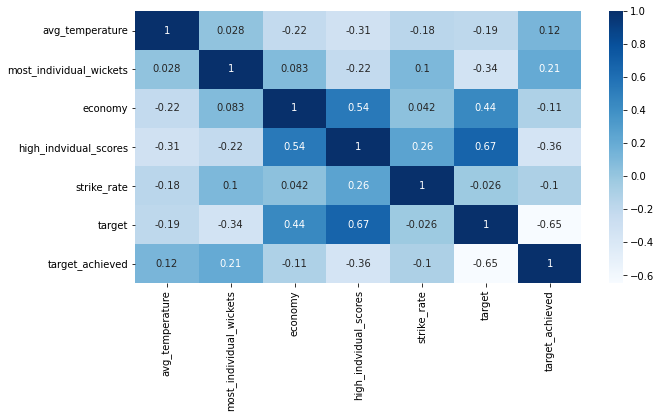

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.Blues)

In [19]:
le = LabelEncoder()
for data in df.columns:
    if df[data].dtypes == 'O':
        df[data] = le.fit_transform(df[data])
    else:
        pass

In [22]:
df

,Unnamed: 0,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,bowling_arm,bowling_style,most_individual_wickets,economy,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
0,0,1,10,1,1,1,0,0,30,9,1,3,2,4.80,1,1,1,40,111.10,8,119,1,12,1
1,11,2,12,1,3,1,1,1,33,1,1,0,4,0.90,3,9,1,24,109.10,3,56,1,17,2
2,22,8,2,1,9,1,0,2,34,19,0,1,2,5.67,2,3,0,80,163.20,9,172,1,3,8
3,27,6,4,1,7,1,1,1,34,18,0,3,3,7.75,7,16,1,79,143.60,6,152,1,26,6
4,28,0,9,1,0,0,1,2,33,13,1,1,5,5.00,0,17,0,59,173.53,0,191,0,19,0
5,29,7,12,1,8,1,0,1,33,4,1,3,3,8.05,9,6,0,56,160.00,10,144,1,1,7
6,30,6,6,1,7,1,1,2,29,6,1,3,4,5.50,7,16,1,33,97.06,6,135,1,8,6
7,31,2,2,1,2,0,0,0,30,24,0,3,3,6.75,3,8,1,61,160.50,3,125,1,10,2
8,32,4,8,1,5,1,1,0,29,15,0,3,3,4.25,5,14,1,44,162.90,7,110,1,25,4
9,1,1,11,1,1,1,1,1,28,0,1,0,2,3.00,1,5,0,65,154.76,1,155,1,0,1


In [26]:
x = df.iloc[:,:-1]
x

,Unnamed: 0,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,bowling_arm,bowling_style,most_individual_wickets,economy,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match
0,0,1,10,1,1,1,0,0,30,9,1,3,2,4.80,1,1,1,40,111.10,8,119,1,12
1,11,2,12,1,3,1,1,1,33,1,1,0,4,0.90,3,9,1,24,109.10,3,56,1,17
2,22,8,2,1,9,1,0,2,34,19,0,1,2,5.67,2,3,0,80,163.20,9,172,1,3
3,27,6,4,1,7,1,1,1,34,18,0,3,3,7.75,7,16,1,79,143.60,6,152,1,26
4,28,0,9,1,0,0,1,2,33,13,1,1,5,5.00,0,17,0,59,173.53,0,191,0,19
5,29,7,12,1,8,1,0,1,33,4,1,3,3,8.05,9,6,0,56,160.00,10,144,1,1
6,30,6,6,1,7,1,1,2,29,6,1,3,4,5.50,7,16,1,33,97.06,6,135,1,8
7,31,2,2,1,2,0,0,0,30,24,0,3,3,6.75,3,8,1,61,160.50,3,125,1,10
8,32,4,8,1,5,1,1,0,29,15,0,3,3,4.25,5,14,1,44,162.90,7,110,1,25
9,1,1,11,1,1,1,1,1,28,0,1,0,2,3.00,1,5,0,65,154.76,1,155,1,0


In [27]:
y = pd.DataFrame(df.iloc[:,-1])
y

,Winner
0,1
1,2
2,8
3,6
4,0
5,7
6,6
7,2
8,4
9,1


In [44]:
## Select K best
best_features = SelectKBest(score_func=f_classif, k = 8)
fit = best_features.fit(x,y)

columns = pd.DataFrame(x.columns)
p_values = pd.DataFrame(fit.pvalues_)
f_score = pd.DataFrame(fit.scores_)

feature_score = pd.concat([columns,p_values,f_score],axis=1)
feature_score.columns = ['FEATURES','P_VALUES','F_SCORE']
feature_score.sort_values(by='F_SCORE',ascending=False).head(10)


D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\ANACONDA\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,FEATURES,P_VALUES,F_SCORE
1,team_1,0.000000,inf
19,best_batter_team,0.000065,7.180626
14,best_bowler_country,0.001289,4.700510
4,Winner_toss,0.003186,4.055783
5,Toss_descision,0.032746,2.569636
16,batting_hand,0.170921,1.610240
22,Player_of_the_match,0.206753,1.499655
9,best_bowler,0.234232,1.426503
12,most_individual_wickets,0.244878,1.400282
6,time,0.281904,1.316498


In [47]:
## Select K best
best_features = SelectKBest(score_func=f_regression, k = 8)
fit = best_features.fit(x,y)

columns = pd.DataFrame(x.columns)
p_values = pd.DataFrame(fit.pvalues_)
f_score = pd.DataFrame(fit.scores_)

feature_score = pd.concat([columns,p_values,f_score],axis=1)
feature_score.columns = ['FEATURES','P_VALUES','F_SCORE']
feature_score.sort_values(by='F_SCORE',ascending=False).head(10)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,FEATURES,P_VALUES,F_SCORE
1,team_1,1.543639e-239,6.980579e+16
4,Winner_toss,5.634893e-05,2.174063e+01
19,best_batter_team,8.116028e-05,2.056184e+01
14,best_bowler_country,1.249334e-04,1.920534e+01
12,most_individual_wickets,3.098378e-03,1.029231e+01
10,bowling_arm,3.872064e-02,4.660466e+00
9,best_bowler,7.546025e-02,3.383173e+00
18,strike_rate,1.008688e-01,2.859476e+00
7,venue,1.726529e-01,1.948627e+00
8,avg_temperature,1.965897e-01,1.741681e+00


In [55]:
## Select K best
best_features = SelectKBest(score_func=chi2, k = 8)
fit = best_features.fit(x,y)

columns = pd.DataFrame(x.columns)
p_values = pd.DataFrame(fit.pvalues_)
f_score = pd.DataFrame(fit.scores_)

feature_score = pd.concat([columns,p_values,f_score],axis=1)
feature_score.columns = ['FEATURES','P_VALUES','F_SCORE']
feature_score.sort_values(by='F_SCORE',ascending=False).head(9)

,FEATURES,P_VALUES,F_SCORE
18,strike_rate,4.552072e-12,72.669294
20,target,8.914341e-12,71.184839
22,Player_of_the_match,2.846434e-11,68.612936
1,team_1,1.553920e-08,54.444444
9,best_bowler,1.845043e-08,54.052370
4,Winner_toss,1.461397e-07,49.294815
14,best_bowler_country,3.582023e-06,41.795370
19,best_batter_team,4.673618e-06,41.161950
15,best_batter,8.838526e-06,39.637330


In [292]:
b = feature_score.sort_values(by='F_SCORE',ascending=False).head(9)
b = pd.DataFrame(b.iloc[:,0])
b

,FEATURES
18,strike_rate
20,target
22,Player_of_the_match
1,team_1
9,best_bowler
4,Winner_toss
14,best_bowler_country
19,best_batter_team
15,best_batter


In [71]:
df1 = pd.DataFrame()
for i in b.values:
    df2 =df[i]
    df1 = pd.concat([df1,df2],axis=1)
    

In [72]:
df1 = pd.concat([df1,y],axis=1)
df1

,strike_rate,target,Player_of_the_match,team_1,best_bowler,Winner_toss,best_bowler_country,best_batter_team,best_batter,Winner
0,111.10,119,12,1,9,1,1,8,1,1
1,109.10,56,17,2,1,3,3,3,9,2
2,163.20,172,3,8,19,9,2,9,3,8
3,143.60,152,26,6,18,7,7,6,16,6
4,173.53,191,19,0,13,0,0,0,17,0
5,160.00,144,1,7,4,8,9,10,6,7
6,97.06,135,8,6,6,7,7,6,16,6
7,160.50,125,10,2,24,2,3,3,8,2
8,162.90,110,25,4,15,5,5,7,14,4
9,154.76,155,0,1,0,1,1,1,5,1


In [164]:
le.inverse_transform

array(['Afghanistan', 'Australia', 'England', 'India', 'Namibia',
       'New_Zealand', 'Pakistan', 'SouthAfrica', 'Srilanka', 'Windies'],
      dtype=object)

In [389]:
x= df1.iloc[:,:-1]
x

,strike_rate,target,Player_of_the_match,team_1,best_bowler,Winner_toss,best_bowler_country,best_batter_team,best_batter
0,111.10,119,12,1,9,1,1,8,1
1,109.10,56,17,2,1,3,3,3,9
2,163.20,172,3,8,19,9,2,9,3
3,143.60,152,26,6,18,7,7,6,16
4,173.53,191,19,0,13,0,0,0,17
5,160.00,144,1,7,4,8,9,10,6
6,97.06,135,8,6,6,7,7,6,16
7,160.50,125,10,2,24,2,3,3,8
8,162.90,110,25,4,15,5,5,7,14
9,154.76,155,0,1,0,1,1,1,5


In [282]:
32*0.2

6.4

In [390]:
y = pd.DataFrame(df1.iloc[:,-1])
y

,Winner
0,1
1,2
2,8
3,6
4,0
5,7
6,6
7,2
8,4
9,1


In [391]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.125,shuffle=False)

In [392]:
x_test

,strike_rate,target,Player_of_the_match,team_1,best_bowler,Winner_toss,best_bowler_country,best_batter_team,best_batter
28,140.43,190,27,6,17,7,7,6,2
29,151.35,133,23,3,14,4,4,4,20
30,153.19,167,6,5,11,6,3,5,4
31,128.85,177,15,1,17,1,7,6,16
32,177.08,173,16,1,9,1,1,5,11


In [285]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
RF.score(x_test,y_test)

<ipython-input-285-69ab26ea4651>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train,y_train)


0.8

In [286]:
predict = pd.DataFrame(RF.predict(x_test))
predict.columns = ['Predicted_Winner']
predict

,Predicted_Winner
0,6
1,3
2,5
3,6
4,1


In [407]:
predict.join(y_test,on=y_test.index)

,Predicted_Winner,Winner
0,6,6
1,3,3
2,5,5
3,6,1
4,1,1


In [288]:
Countries.join(Country_code,on=Country_code.index)

,Country,Code
0,Afghanistan,0
1,Australia,1
2,England,2
3,India,3
4,Namibia,4
5,New_Zealand,5
6,Pakistan,6
7,SouthAfrica,7
8,Srilanka,8
9,Windies,9


In [182]:
df1

,strike_rate,target,Player_of_the_match,team_1,best_bowler,Winner_toss,best_bowler_country,best_batter_team,best_batter,Winner
0,111.10,119,12,1,9,1,1,8,1,1
1,109.10,56,17,2,1,3,3,3,9,2
2,163.20,172,3,8,19,9,2,9,3,8
3,143.60,152,26,6,18,7,7,6,16,6
4,173.53,191,19,0,13,0,0,0,17,0
5,160.00,144,1,7,4,8,9,10,6,7
6,97.06,135,8,6,6,7,7,6,16,6
7,160.50,125,10,2,24,2,3,3,8,2
8,162.90,110,25,4,15,5,5,7,14,4
9,154.76,155,0,1,0,1,1,1,5,1


In [193]:
Country_code = pd.DataFrame(Countries.index)
Country_code.columns = ['Code']

In [190]:
Countries = pd.DataFrame(le.classes_)
Countries.columns = ['Country']
Countries

,Country
0,Afghanistan
1,Australia
2,England
3,India
4,Namibia
5,New_Zealand
6,Pakistan
7,SouthAfrica
8,Srilanka
9,Windies


In [181]:
le.classes_

array(['Afghanistan', 'Australia', 'England', 'India', 'Namibia',
       'New_Zealand', 'Pakistan', 'SouthAfrica', 'Srilanka', 'Windies'],
      dtype=object)

In [127]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_test,y_test)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5714285714285714

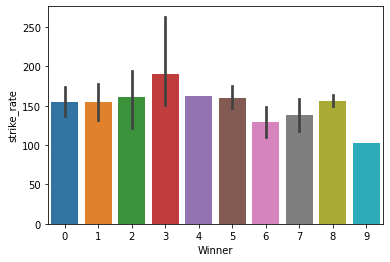

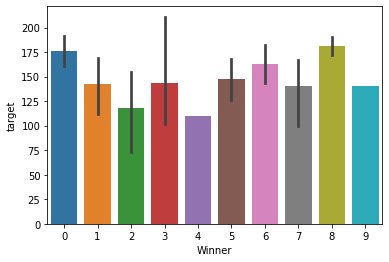

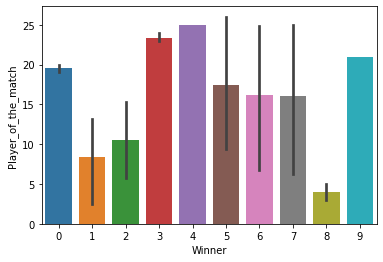

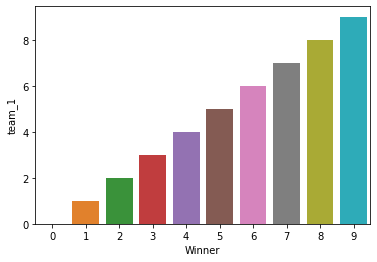

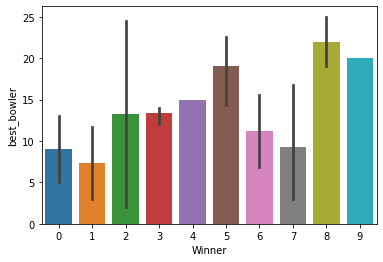

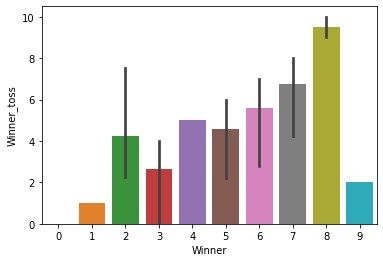

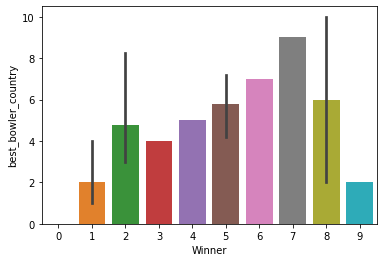

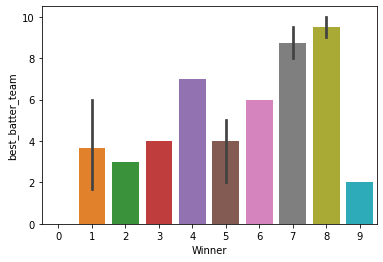

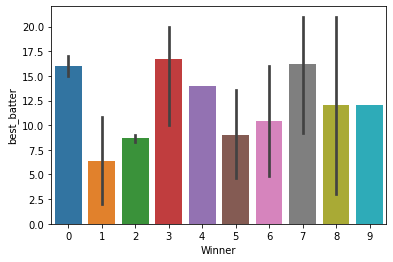

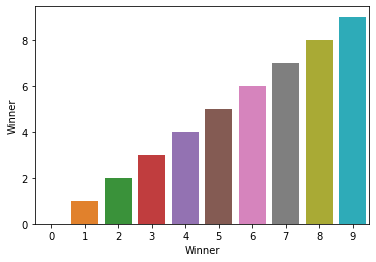

In [172]:
for columns in df1:
    sns.barplot(x=df1['Winner'],y=df1[columns],data=df1)
    plt.show()

In [387]:
df1

,strike_rate,target,Player_of_the_match,team_1,best_bowler,Winner_toss,best_bowler_country,best_batter_team,best_batter,Winner
0,111.10,119,12,1,9,1,1,8,1,1
1,109.10,56,17,2,1,3,3,3,9,2
2,163.20,172,3,8,19,9,2,9,3,8
3,143.60,152,26,6,18,7,7,6,16,6
4,173.53,191,19,0,13,0,0,0,17,0
5,160.00,144,1,7,4,8,9,10,6,7
6,97.06,135,8,6,6,7,7,6,16,6
7,160.50,125,10,2,24,2,3,3,8,2
8,162.90,110,25,4,15,5,5,7,14,4
9,154.76,155,0,1,0,1,1,1,5,1
